# Analysis on Diabetes Dataset

This data set is from Kaggle (link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set), and was originally from the National Institute of Diabetes and Digestive & Kidney Disease. 

Kaggle Owner: Mehmey Akturk

## Interest

I am interested in this data set because diabetes is a disease that affects women differently than men. Personally, my mom had gestational diabetes during her fifth and final pregnancy. Unfortunately, she developed hyperglycemia and is very likely to have Type 2 diabetes later in life. This is a reality for many women, thus studying diabetes in women and using machine learning to predict a diabetes diagnoses are of interest to me. 

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# stats library
import scipy.stats 


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Criteria 

According to the information on Kaggle, constraints were placed on patient selection. Most importantly, all females were at least 21 years old.

## Feature Explanation

Pregnancies: Number of times pregnant\
Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test\
BloodPressure: Diastolic blood pressure (mmHg)\
SkinThickness: Triceps skin fold thickness (mm)\
Insulin: 2-hour serum insulin (mu U/ml)\
BMI: Body Mass Index\
DiabetesPedigreeFunction: Diabetes pedigree function\
Age: Age (years)\
Outcome: Class variable (0 or 1)



0: diabetes-negative\
1: diabetes-positive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No missing values are present in the dataset.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Limitations
From the data frame above, we can see that every value, except DiabetesPedigreeFunction and Age has a 0 value. Although this makes sense for the Pregnancies feature, in context it does not make sense for the Glucose, BloodPressure, SkinThickness, and Insulin feature.

After further exploration of the summary on Kaggle, there are "Missing Attribute Values". I will filter the data later in the notebook. 


Another interesting limitation of the data is the lack of denotation about whether the patients had Type 1 or Type 2 diabetes. Many women develop Type 2 diabetes after developing gestational diabetes in pregnancy. Thus, knowing this could create an interesting dataset. Lastly, there is no information on how the DiabetesPedigreeFunction works. Knowing this could create a more rich analysis. 

## Further Data Exploration - Visual

In [6]:
column_names = df.columns.to_list()
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
positive_df = df[df[column_names[8]] == 1]
print("there are", len(positive_df), "cases of diabetes reported in this dataset")
positive_df.head(5)

there are 268 cases of diabetes reported in this dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [8]:
negative_df = df[df[column_names[8]] == 0]
print("there are", len(negative_df), "cases of diabetes-negative reported in this dataset")
negative_df.head(5)

there are 500 cases of diabetes-negative reported in this dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [9]:
positive_df_description = positive_df.describe()
positive_df_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [10]:
negative_df_description = negative_df.describe()
negative_df_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


The 0 min values occur in both the diabetes-positive and diabetes-negative data set, meaning there is no indication from the abobv dfs to suggest either group had a more comprehensive data set. 

In [11]:
# creating a list of the index values for the describe data sets
index = []
for i in range(len(negative_df_description)):
    index.append(negative_df_description.index[i])


In [12]:
# creating a dictionary by feature of summary statistice from the describe method to use in analysis

index = []
for i in range(len(negative_df_description)):
    index.append(negative_df_description.index[i])


def dictionary_of_statistics(df):
    all_cols = {}
    
    for column in df:
        col_name = column
        col_values = df.get(col_name).to_list()
        all_cols[col_name] = {key:value for (key, value) in zip(index, col_values)}
    return all_cols

In [13]:
dic_1 = dictionary_of_statistics(positive_df_description)
dic_0 = dictionary_of_statistics(negative_df_description)
if len(dic_1) == 9:
    print("no error in dictionary creation")

no error in dictionary creation


In [14]:
# funtion to display summary statistics by feature

def display_summary(all_dicts, column_number):
    if all_dicts['Outcome']["count"] == 268:
        print(f"SUMMARY ABOUT {column_names[column_number]} for female diabetes positive patients :")
    elif all_dicts['Outcome']["count"] == 500: 
        print(f"SUMMARY ABOUT {column_names[column_number]} for female diabetes negative patients :")

    for summary_name, summary_value in all_dicts[column_names[column_number]].items():
        print(f"{summary_name} is {summary_value}")

In [15]:
display_summary(dic_1, 0)

SUMMARY ABOUT Pregnancies for female diabetes positive patients :
count is 268.0
mean is 4.865671641791045
std is 3.741239044041554
min is 0.0
25% is 1.75
50% is 4.0
75% is 8.0
max is 17.0


## plots of individual features

In [16]:
def plot_hist(dic_1, dic_0, column_number):
    plt.hist( positive_df[column_names[column_number]], bins = 20, histtype = 'step',  fill = False, color = "blue", alpha = 1)
    plt.hist( negative_df[column_names[column_number]], bins = 20, histtype = 'step', fill = False, color = "gray", alpha = 1)
    plt.xlabel(column_names[column_number])
    plt.ylabel("Number of Female Patients")
    if column_number == 2 :
        plt.xlabel(column_names[column_number] + " in (mmHg)")
        plt.title("Distribution of " + column_names[column_number] + " in (mmHg)")
    if column_number == 3 :
        plt.xlabel(column_names[column_number] + " in (mm)")
        plt.title("Distribution of " + column_names[column_number] + " in (mm)")
    if column_number == 3 :
        plt.xlabel(column_names[column_number] + " in (mu U/ml)")
        plt.title("Distribution of " + column_names[column_number] + " in (mu U/ml)")
    else:
        plt.title("Distribution of " + column_names[column_number])
        plt.xlabel(column_names[column_number])
    plt.legend(["positive", "negative"])
    plt.axvline(positive_df[column_names[column_number]].mean(), color = "blue", alpha = .5)
    plt.axvline(negative_df[column_names[column_number]].mean(), color = "gray", alpha = 1)
    plt.show() 

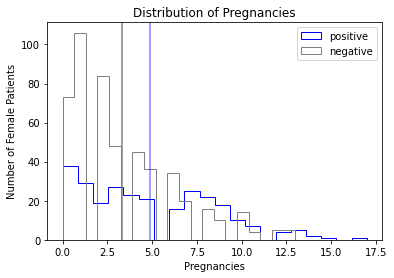

SUMMARY ABOUT Pregnancies for female diabetes positive patients :
count is 268.0
mean is 4.865671641791045
std is 3.741239044041554
min is 0.0
25% is 1.75
50% is 4.0
75% is 8.0
max is 17.0
 
SUMMARY ABOUT Pregnancies for female diabetes negative patients :
count is 500.0
mean is 3.298
std is 3.01718458262189
min is 0.0
25% is 1.0
50% is 2.0
75% is 5.0
max is 13.0


In [17]:
plot_hist(dic_1, dic_0, 0)
display_summary(dic_1, 0)
print(" ")
display_summary(dic_0, 0)

Both distributions are skewed right.

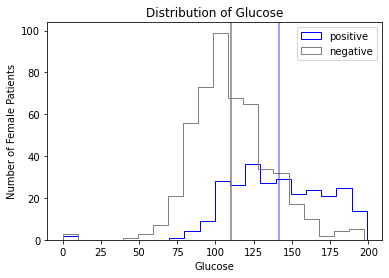

no unit of measurement was given for the glucose measurement and thus it is not included
SUMMARY ABOUT Glucose for female diabetes positive patients :
count is 268.0
mean is 141.25746268656715
std is 31.939622058007195
min is 0.0
25% is 119.0
50% is 140.0
75% is 167.0
max is 199.0
 
SUMMARY ABOUT Glucose for female diabetes negative patients :
count is 500.0
mean is 109.98
std is 26.14119975535359
min is 0.0
25% is 93.0
50% is 107.0
75% is 125.0
max is 197.0


In [18]:
plot_hist(dic_1, dic_0, 1)

print("no unit of measurement was given for the glucose measurement and thus it is not included")

display_summary(dic_1, 1)
print(" ")
display_summary(dic_0, 1)

#### A few 0s in Glucose which I assume is a missing value.

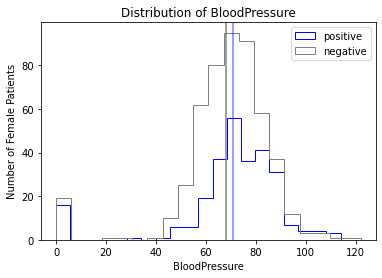

SUMMARY ABOUT BloodPressure for female diabetes positive patients :
count is 268.0
mean is 70.82462686567165
std is 21.49181165060413
min is 0.0
25% is 66.0
50% is 74.0
75% is 82.0
max is 114.0
 
SUMMARY ABOUT BloodPressure for female diabetes negative patients :
count is 500.0
mean is 68.184
std is 18.063075413305828
min is 0.0
25% is 62.0
50% is 70.0
75% is 78.0
max is 122.0


In [19]:
plot_hist(dic_1, dic_0, 2)
display_summary(dic_1, 2)
print(" ")
display_summary(dic_0, 2)

#### Lots of 0s in Blood Pressure for both groups indicating a lot of missing values.

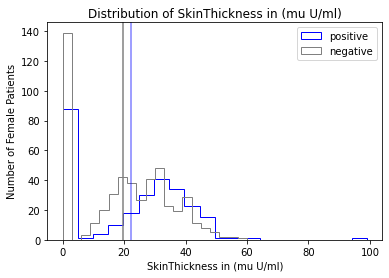

SUMMARY ABOUT SkinThickness for female diabetes positive patients :
count is 268.0
mean is 22.16417910447761
std is 17.67971140046571
min is 0.0
25% is 0.0
50% is 27.0
75% is 36.0
max is 99.0
 
SUMMARY ABOUT SkinThickness for female diabetes negative patients :
count is 500.0
mean is 19.664
std is 14.889947113744254
min is 0.0
25% is 0.0
50% is 21.0
75% is 31.0
max is 60.0


In [20]:
plot_hist(dic_1, dic_0, 3)

display_summary(dic_1, 3)
print(" ")
display_summary(dic_0, 3)

#### Lots of 0s for SkinThickness in both groups.

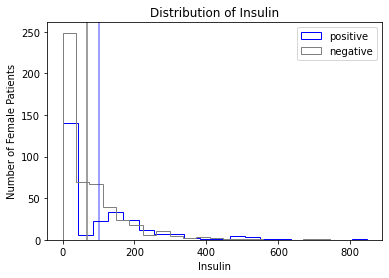

SUMMARY ABOUT Insulin for female diabetes positive patients :
count is 268.0
mean is 100.33582089552239
std is 138.6891247315351
min is 0.0
25% is 0.0
50% is 0.0
75% is 167.25
max is 846.0
 
SUMMARY ABOUT Insulin for female diabetes negative patients :
count is 500.0
mean is 68.792
std is 98.86528929231767
min is 0.0
25% is 0.0
50% is 39.0
75% is 105.0
max is 744.0


In [21]:
plot_hist(dic_1, dic_0, 4)
display_summary(dic_1, 4)
print(" ")
display_summary(dic_0, 4)

#### Lots of 0s for Insulin in both groups.

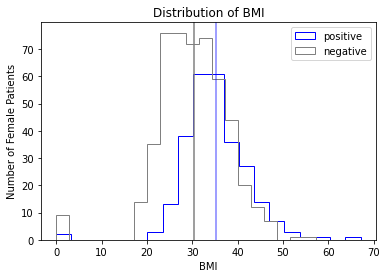

SUMMARY ABOUT BMI for female diabetes positive patients :
count is 268.0
mean is 35.14253731343278
std is 7.262967242346376
min is 0.0
25% is 30.8
50% is 34.25
75% is 38.775000000000006
max is 67.1
 
SUMMARY ABOUT BMI for female diabetes negative patients :
count is 500.0
mean is 30.30419999999996
std is 7.689855011650112
min is 0.0
25% is 25.4
50% is 30.05
75% is 35.3
max is 57.3


In [22]:
plot_hist(dic_1, dic_0, 5)
display_summary(dic_1, 5)
print(" ")
display_summary(dic_0, 5)

In [23]:
#### A few 0s for Insulin in both groups.

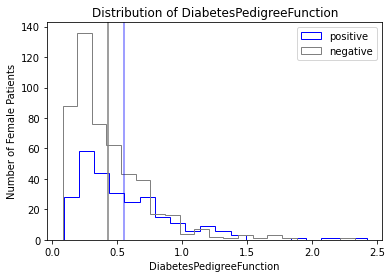

SUMMARY ABOUT DiabetesPedigreeFunction for female diabetes positive patients :
count is 268.0
mean is 0.5505
std is 0.372354483554611
min is 0.088
25% is 0.2625
50% is 0.449
75% is 0.728
max is 2.42
 
SUMMARY ABOUT DiabetesPedigreeFunction for female diabetes negative patients :
count is 500.0
mean is 0.42973400000000017
std is 0.29908530435741093
min is 0.078
25% is 0.22975
50% is 0.336
75% is 0.56175
max is 2.329


In [24]:
plot_hist(dic_1, dic_0, 6)
display_summary(dic_1, 6)
print(" ")
display_summary(dic_0, 6)

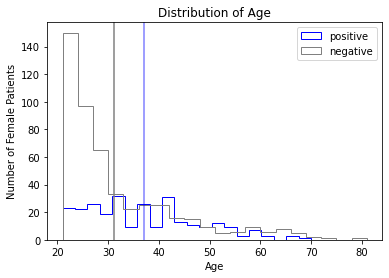

SUMMARY ABOUT Age for female diabetes positive patients :
count is 268.0
mean is 37.06716417910448
std is 10.968253652367915
min is 21.0
25% is 28.0
50% is 36.0
75% is 44.0
max is 70.0
 
SUMMARY ABOUT Age for female diabetes negative patients :
count is 500.0
mean is 31.19
std is 11.667654791631156
min is 21.0
25% is 23.0
50% is 27.0
75% is 37.0
max is 81.0


In [25]:
plot_hist(dic_1, dic_0, 7)
display_summary(dic_1, 7)
print(" ")
display_summary(dic_0, 7)

In [26]:
def bar_plot(dic_1, dic_0, column_number):
    diagnosis = ["diabetes positive", "diabetes negative"]
    y = [dic_1[column_names[column_number]]["mean"], dic_0[column_names[column_number]]["mean"]]
    error = [dic_1[column_names[column_number]]["std"], dic_0[column_names[column_number]]["std"]]
    c = ["orange", "blue"]
    
    plt.bar(diagnosis, y, yerr = error, color = c)
    plt.ylabel(f"Mean {column_names[column_number]}")
    plt.title(f"Mean {column_names[column_number]} for Female Study Patients")
    plt.grid(axis="y")
    
    plt.show()

# Hypothesis test for Pregnancy Data

It is known amongst medical professionals and many women that pregnancy can cause or exacerbate diabetes. In the Unites States, around 2 - 10% of pregnant non-diabetic women develop gestational diabetes (GD) (https://www.cdc.gov/diabetes/basics/gestational.html). Additionally, having GD increases one's risk of developing Type II diabetes later in life. Thus, it makes sense to explore the relationship between number of pregnancies and diabetes.

I want to explore whether diabetes-positive women have had more pregnancies that diabetes-negative women on average. I think that since prenancy and developing diabetes are related for women, perhaps women who have had more pregnancies are more likely to also have diabetes. Although I do not have the data to explore whether pregnancy causes diabetes, I do have the data to explore if the average number of pregnancies amongst diabetic women is greater than the average number of pregnancies amongst non-diabetic women.

I am going to perform a difference of means hypothesis test using the t-distribution on the pregnancy data.


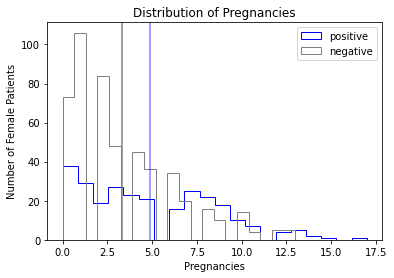

In [27]:
# same plot above
plot_hist(dic_1, dic_0, 0)

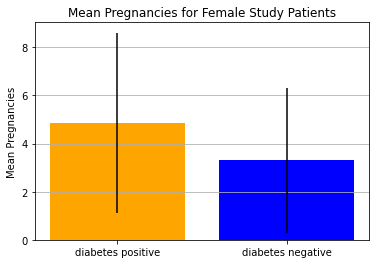

In [28]:
bar_plot(dic_1, dic_0, 0)

In [29]:
display_summary(dic_1, 0)
print(" ")
display_summary(dic_0, 0)

SUMMARY ABOUT Pregnancies for female diabetes positive patients :
count is 268.0
mean is 4.865671641791045
std is 3.741239044041554
min is 0.0
25% is 1.75
50% is 4.0
75% is 8.0
max is 17.0
 
SUMMARY ABOUT Pregnancies for female diabetes negative patients :
count is 500.0
mean is 3.298
std is 3.01718458262189
min is 0.0
25% is 1.0
50% is 2.0
75% is 5.0
max is 13.0


Both the histogram of the distribution of pregnancies amongst diabetes-positive and diabetes-negative women and the barplot of average number of pregnancies for diabetes-positive and diabetes-negative women indicate the diabetes-positive group have more pregnancies.

Below are the SE and T formula for my test.

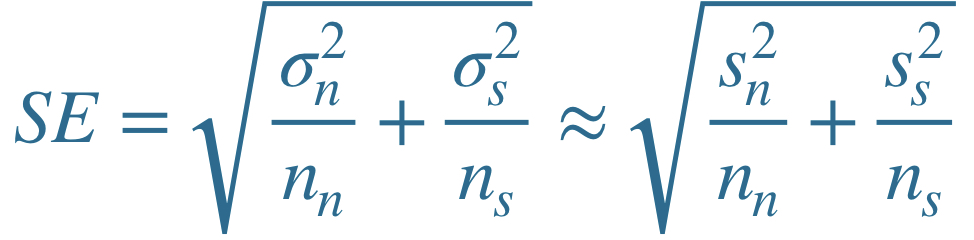

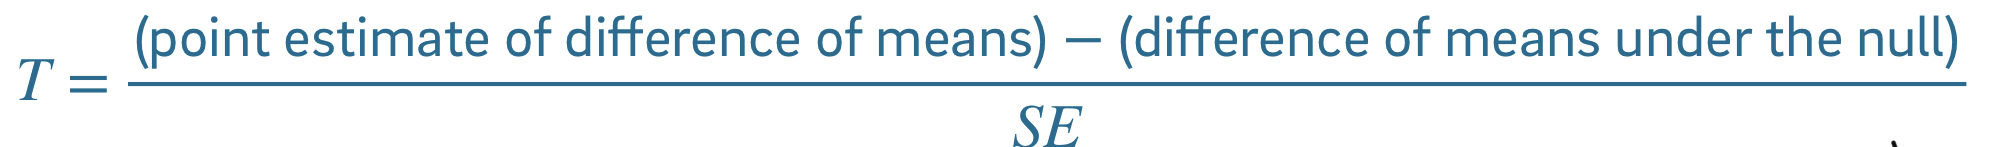

In [30]:
# functions to find P-value

def point_estimate(dic_1, dic_0, column_number):
    point_estimate = dic_1[column_names[0]]["mean"] - dic_0[column_names[0]]["mean"]
    return(point_estimate)

def t_testSE(dic_1, dic_0, column_number):
    s1 = dic_1[column_names[column_number]]["std"]
    s2 = dic_0[column_names[column_number]]["std"]
    
    count1 = dic_1[column_names[column_number]]["count"]
    count2 = dic_0[column_names[column_number]]["count"]

    s1_square = s1**2
    s2_square = s2**2
    
    SE = ( (s1_square / count1) + (s2_square / count2) ) ** (1/2)
    
    return SE

def T(point_estimate, null_difference, SE):
    T = (point_estimate - null_difference)/SE
    return T

def d_f(dic_1, dic_0, column_number):
    n = min(dic_1[column_names[0]]["count"],  dic_0[column_names[0]]["count"])
    df = n-1
    return df

def hypothesis_t_dist(dic_1, dic_0, column_number, alpha):
    pt_estimate = point_estimate(dic_1, dic_0, column_number)
    print("point_estimate:", pt_estimate)
    
    SE = t_testSE(dic_1, dic_0, column_number)
    print("standard error", SE)
    
    df = d_f(dic_1, dic_0, column_number)
    print("degrees of freedom", df)
    
    x = T(pt_estimate, 0, SE)
    print("test_statistic:", x)
    
    print(" ")
    
    p_value = (scipy.stats.t.sf(abs(5.9069614794974905), df = 267))
    print("p_value", p_value)
    
    print(" ")

    if p_value < alpha:
        print(f"At an alpha of {alpha}, we reject the null hypothesis.")
    if p_value > alpha:
        print("We fail to reject the null hypothesis.")
        
    return p_value
    

# Hypothesis test for Pregnancy Data
mu_p1 : True population average for number of pregnancies for diabetes-positive women\
mu_p0 : True population average for number of pregnancies for diabetes-negative women

H0: There is no difference in average number of pregnancies for women diabetes positive and women diabetes negative. mu_p1-mu_p0 = 0\
HA: The average number of pregnancies for women diabetes positive is greater than for women diabetes negative. mu_p1 > mu_p0

## Conditions
### Independence: 
Unfortunately, it is unclear whether these patients were selcted randomly. The only information on data selection is that there were constraints on the age of the patient. However, National Institute of Diabetes and Digestive and Kidney Diseases is a reputable institution and I will assume the lack of stated independence of data selection on Kaggle was a mistake by the owner of the data set on Kaggle.
### Lack of outliers: 
As shown by the histogram, there are no extreme outliers as the max pregnancy is 17. 

### note on 0 values
Number of pregnancies reported as 0 is reasonable since many women may not have / have not yet had kids. Thus, it seems inappropriate to filter out 0 values for this analysis.

In [31]:
hypothesis_t_dist(dic_1, dic_0, 0, .05)

point_estimate: 1.567671641791045
standard error 0.26539391652244326
degrees of freedom 267.0
test_statistic: 5.9069614794974905
 
p_value 5.2875210212892e-09
 
At an alpha of 0.05, we reject the null hypothesis.


5.2875210212892e-09

## conclusion

At the 95% confidence level, we reject the null hypothesis that there is no difference between the mean pregnancies of women positive with diabetes and women negative with diabetes. Instead, we suggest the alternative hypothesis that diabetes-positive women on average have has more pregnancies than diabetes negative women.

## limitations
As seen in the "Distribution of Age" and "Distribution of Pregnancies" histogram in this notebook, there seems to be a right-skew to both of these data sets for the diabetes-negative group. Thus, it is difficult to assay whether there is a true difference between the number of pregnancies for women diabetes-positive and the number of pregnancies for women-diabeted negative. Because, as women grow older they are likely to have more pregnancies. Thus, it is unclear whether this difference is caused by the skew in ages of the study's data set or is a true reflection of population differences. 

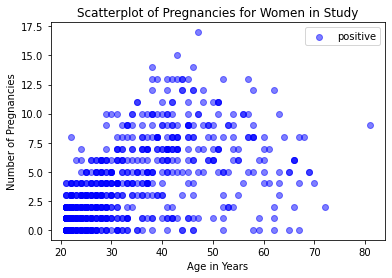

average age of diabetes-positive study participant 37.06716417910448
standard deviation of age for diabetes-positive group: 10.968253652367915
 
average age of diabetes-negative study participant 31.19
standard deviation of age for diabetes-negative group: 11.667654791631156


In [32]:
plt.scatter(df.get("Age").to_list(), df.get("Pregnancies").to_list(), color = "blue", alpha = .5)

plt.xlabel("Age in Years")
plt.ylabel("Number of Pregnancies")
plt.title("Scatterplot of Pregnancies for Women in Study")
plt.legend(["positive", "negative"])
plt.show()

print("average age of diabetes-positive study participant", dic_1["Age"]["mean"])
print("standard deviation of age for diabetes-positive group:", dic_1["Age"]["std"])
print(" ")
print("average age of diabetes-negative study participant", dic_0["Age"]["mean"])
print("standard deviation of age for diabetes-negative group:", dic_0["Age"]["std"])

### Graph Analysis
The graph above shows that there may be a positive linear relationship between age and number of pregnancies showing that as one ages, they are more likely to have had more pregnancies. Additionally, the average age of diabetes-positive women in the study is greater than the average age of diabetes-negative women in the study. However, the mean ages are within one standard deviation so this may not affect these results.



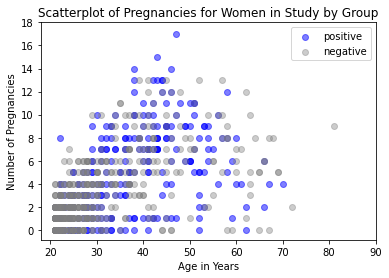

In [33]:
plt.scatter(positive_df.get("Age").to_list(), positive_df.get("Pregnancies").to_list(), color = "blue", alpha = .5)
plt.scatter(negative_df.get("Age").to_list(), negative_df.get("Pregnancies").to_list(), color = "gray", alpha = .4)
plt.yticks(range(0,20,2))
plt.xticks(range(20,100,10))

plt.xlabel("Age in Years")
plt.ylabel("Number of Pregnancies")
plt.title("Scatterplot of Pregnancies for Women in Study by Group")
plt.legend(["positive", "negative"])
plt.show()

As we can see in this scatter plot, the bottom left corner of the graph is concentrated with young study patients with low pregnancies which could skew the result heavily in favor of their being a difference in the number of pregnancies between diabetes-positive women and diabetes negative women.

In [34]:
## filter data

In [35]:
df_describe = df.describe()
df_describe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
dic_all = dictionary_of_statistics(df_describe)

In [37]:
# creates dictionary of outliers by feature
def find_outliers(df, dic):
    
    
    outliers = {}
    
    for column in df:
        col_name = column
        
        IQR = dic[col_name]["75%"] - dic[col_name]["25%"]
    
        lower_bound = dic[col_name]["25%"] - (1.5*IQR)
        upper_bound = dic[col_name]["75%"] + (1.5*IQR)
        
        col_values = [lower_bound, upper_bound]
        outliers[col_name] = col_values
                                
    return outliers
    

In [38]:
# dictionary of outliers, outliers validated by hand
outliers = find_outliers(df_describe, dic_all)
outliers

{'Pregnancies': [-6.5, 13.5],
 'Glucose': [37.125, 202.125],
 'BloodPressure': [35.0, 107.0],
 'SkinThickness': [-48.0, 80.0],
 'Insulin': [-190.875, 318.125],
 'BMI': [13.35, 50.550000000000004],
 'DiabetesPedigreeFunction': [-0.32999999999999996, 1.2],
 'Age': [-1.5, 66.5],
 'Outcome': [-1.5, 2.5]}

In [39]:
df_filtered= df[(df[column_names[0]] > outliers[column_names[0]][0] ) & (df[column_names[0]] < outliers[column_names[0]][1]) &\
                (df[column_names[1]] > outliers[column_names[1]][0]) & (df[column_names[1]] < outliers[column_names[1]][1]) &\
                (df[column_names[2]] > outliers[column_names[2]][0]) & (df[column_names[2]] < outliers[column_names[2]][1]) &\
                (df[column_names[3]] > outliers[column_names[3]][0]) & (df[column_names[3]] < outliers[column_names[3]][1]) &\
                (df[column_names[4]] > outliers[column_names[4]][0]) & (df[column_names[4]] < outliers[column_names[4]][1]) &\
                (df[column_names[5]] > outliers[column_names[5]][0]) & (df[column_names[5]] < outliers[column_names[5]][1]) &\
                (df[column_names[6]] > outliers[column_names[6]][0]) & (df[column_names[6]] < outliers[column_names[6]][1]) &\
                (df[column_names[7]] > outliers[column_names[7]][0]) & (df[column_names[7]] < outliers[column_names[7]][1])]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63,0
635,2,122,70,27,0,36.8,0.340,27,0
636,5,121,72,23,112,26.2,0.245,30,0
637,1,126,60,0,0,30.1,0.349,47,1


#### I am hesitant to get rid of all the 0 values so I filtered out the outliers

### PCA Analysis

I am going to perform a PCA analysis to see whether there is a difference between the diabetes-positive and diabetes-negative group when vizualized in 2-D.

Since PCA is sensitive to outliers I will use df_filtered. 

In [40]:
df_filtered.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


In [41]:
# features will include all but Outcome
features = column_names[:-1]

In [42]:
x =df_filtered.loc[:, features].values
y = df_filtered.iloc[:,-1:].values

In [43]:
x = StandardScaler().fit_transform(x)

In [44]:
pca = PCA(n_components=2)

In [45]:
principalComponents = pca.fit_transform(x)

In [46]:
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'] )
principalDF

,principal component 1,principal component 2
0,1.664481,-0.382043
1,-1.576753,-0.115094
2,0.374772,-1.646611
3,-1.850197,0.499302
4,-0.817253,-1.784611
...,...,...
634,2.394198,-0.161394
635,-0.375038,0.350034
636,-0.282994,-0.126166
637,-0.626776,-1.394894


In [47]:
finalDF = pd.concat([principalDF, df_filtered[['Outcome']]], axis = 1)

In [48]:
finalDF

,principal component 1,principal component 2,Outcome
0,1.664481,-0.382043,1
1,-1.576753,-0.115094,0
2,0.374772,-1.646611,1
3,-1.850197,0.499302,0
4,-0.817253,-1.784611,0
...,...,...,...
634,2.394198,-0.161394,0
635,-0.375038,0.350034,0
636,-0.282994,-0.126166,0
637,-0.626776,-1.394894,1


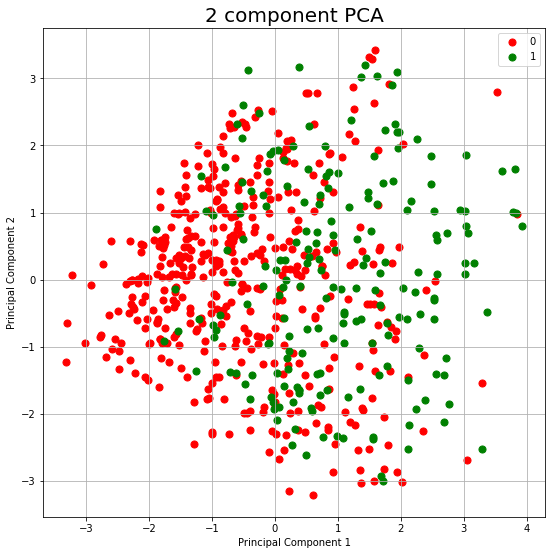

In [49]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)

outcomes = [0, 1]
colors = ['r', 'g']
for outcome, color in zip(outcomes,colors):
    indicesToKeep = finalDF['Outcome'] == outcome
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(outcomes)
ax.grid()

## PCA Analysis

It seems by this graph that when the data is realized in 2-D, there seems to be a differentation between the diabetes-positive and diabetes-negative groups

# Which model / dataset / features creates the best ML Algorithm 

# KMeans Cluster Analysis - Raw Data

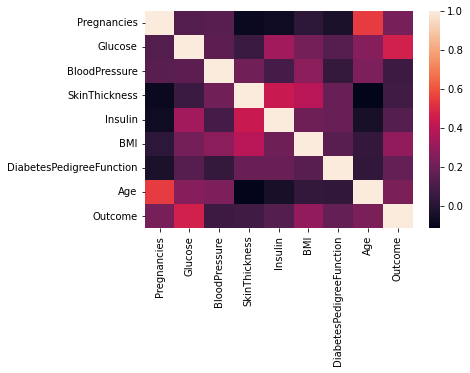

In [50]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

### Correlation Graph Analysis

There seems to be a low correlation for the features "SkinThickness", "Age", and "BloodPressure" so I will remove them.

<AxesSubplot:>

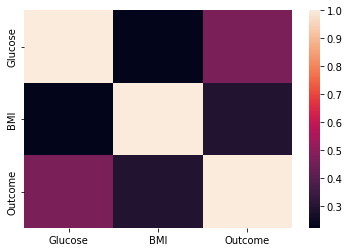

In [51]:
DF = df.drop(["SkinThickness", "Pregnancies", "Age", "BloodPressure", "Insulin", "DiabetesPedigreeFunction" ], axis = 1)
corr = DF.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

### Correlation Graph Analysis

This correlation graph improves  as the scale begins at .2

In [52]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [53]:
selected_feature1 = 'Glucose'
selected_feature2 = 'BMI'

features = [selected_feature1, selected_feature2]

In [54]:
num_clusters = 2
Kmean_1 = KMeans(n_clusters = num_clusters)
Kmean_1.fit(df[features])

KMeans(n_clusters=2)

In [55]:
type(Kmean_1)

sklearn.cluster._kmeans.KMeans

In [56]:
Kmean_1.cluster_centers_

array([[102.97087379,  30.77300971],
       [157.37944664,  34.47509881]])

In [57]:
Kmean_1.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [58]:
X = df[features]

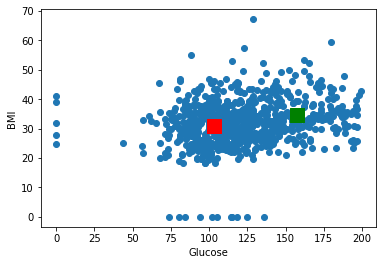

In [59]:
plt.scatter(data=X, x=selected_feature1, y=selected_feature2)
plt.xlabel('Glucose')
plt.ylabel('BMI')
colors = ['r','g']
for i, coor in enumerate(Kmean_1.cluster_centers_):
    plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')

### The above graph shows the two centriods calculated by the model.

Text(0, 0.5, 'BMI')

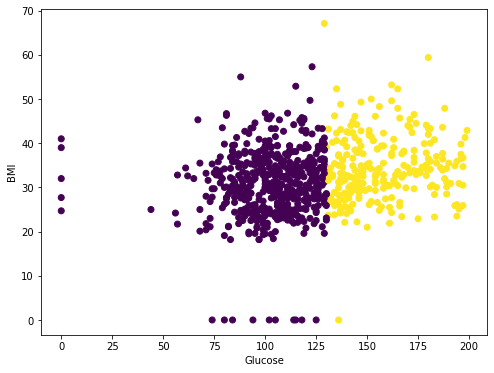

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Kmean_1.labels_.astype(float))
plt.xlabel('Glucose')
plt.ylabel('BMI')

This graph shows the two clusters found by the model.

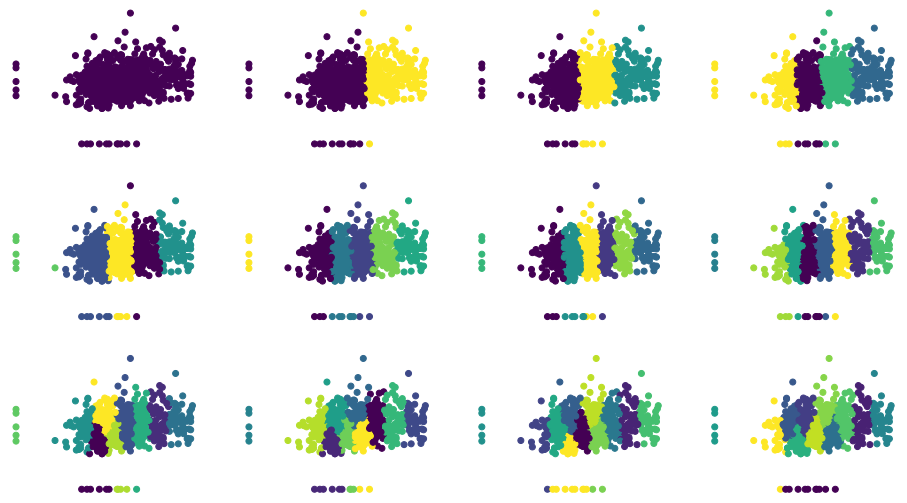

In [61]:
maxk = 13
wcss = []
sil_score = []

X = df[features]

fig, axes = plt.subplots(3, 4, figsize=(16,9))

for k, ax in zip(range(1,maxk), axes.flatten()):
    Kmean_1 = KMeans(k)
    Kmean_1.fit(X)
    ax.axis('off')
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=Kmean_1.labels_.astype(float))
    
    # compute the within-cluster sum of squares (WCSS)
    wcss.append(Kmean_1.inertia_) 
    
    if k > 1:
        sil_score.append(metrics.silhouette_score(X, Kmean_1.labels_, metric='euclidean'))


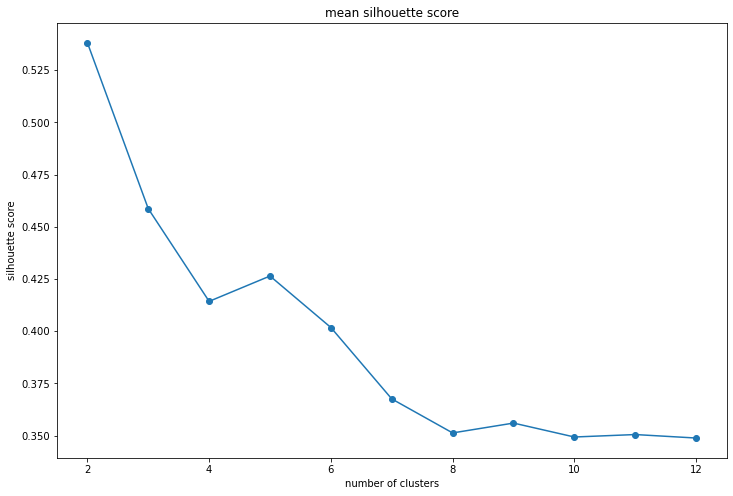

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(2,maxk), sil_score, 'o-')


ax.set_title('mean silhouette score')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score');

#### 2 clusters seems like the right amount because it has the highest silhouette score.

In [63]:
num_clusters = 2
Kmean_1 = KMeans(n_clusters=num_clusters)
Kmean_1.fit(df[features])

# make new column for "cluster label" and assign cluster label value based on kmeans analysis

df.loc[Kmean_1.labels_==0,'cluster_label'] = 0
df.loc[Kmean_1.labels_==1,'cluster_label'] = 1

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,6,148,72,35,0,33.6,0.627,50,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1.0


In [64]:
outcome = df.get("Outcome").to_list()
prediction = df.get("cluster_label").to_list()

In [65]:
def compare_outcome(arr1, arr2):
    counter = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            counter += 1
            
    accuracy = counter/len(arr1)
    num_correct = counter
    num_wrong = len(arr1)- counter
    return accuracy, num_correct, num_wrong

In [66]:
features

['Glucose', 'BMI']

In [67]:
accuracy_K1, valid_predictions_K1, invalid_predictions_K1  = compare_outcome(outcome, prediction)
print(accuracy_K1)
print(valid_predictions_K1)
print(invalid_predictions_K1)

0.7408854166666666
569
199


In [68]:
print(f"Incorrectly Predicted:  {invalid_predictions_K1}")
print(f"Correctly Predicted:  {valid_predictions_K1}")
print(f"Accuracy Percentage:   {(round((accuracy_K1)*100))} %")

Incorrectly Predicted:  199
Correctly Predicted:  569
Accuracy Percentage:   74 %


## Kmeans Analysis Using Filtered Data Frame

In [69]:
df_filtered.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


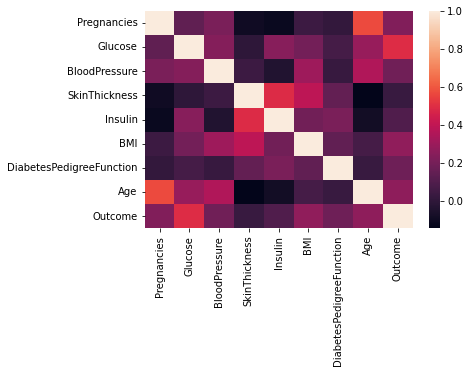

In [70]:
corr = df_filtered.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

### Correlation Graph Analysis

There seems to be a low correlation for the features "SkinThickness", "Age", and "BloodPressure" so I will remove them.

<AxesSubplot:>

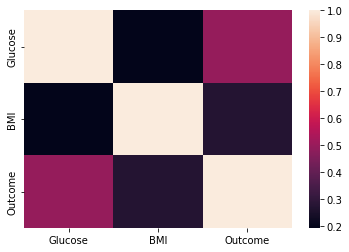

In [71]:
DF = df_filtered.drop(["SkinThickness", "Pregnancies", "Age", "BloodPressure", "Insulin", "DiabetesPedigreeFunction" ], axis = 1)
corr = DF.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

### Correlation Graph Analysis

This correlation graph improves  as the scale begins at .2.

In [72]:
selected_feature1 = 'Glucose'
selected_feature2 = 'BMI'

features = [selected_feature1, selected_feature2]

In [73]:
num_clusters = 2
Kmean_2 = KMeans(n_clusters = num_clusters)
Kmean_2 .fit(df_filtered[features])

KMeans(n_clusters=2)

In [74]:
type(Kmean_2 )

sklearn.cluster._kmeans.KMeans

In [75]:
Kmean_2 .cluster_centers_

array([[102.91533181,  31.35011442],
       [154.15346535,  33.42425743]])

In [76]:
Kmean_2.labels_

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [77]:
X = df_filtered[features]

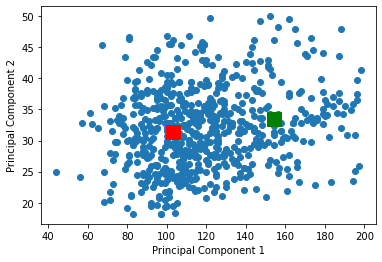

In [78]:
plt.scatter(data=X, x=selected_feature1, y=selected_feature2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
colors = ['r','g']
for i, coor in enumerate(Kmean_2.cluster_centers_):
    plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')

This graph shows the two centriods found by the model.

Text(0, 0.5, 'Principal Component 2')

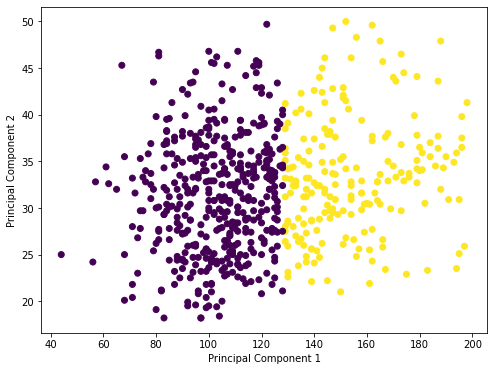

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Kmean_2.labels_.astype(float))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

This graph shows the two clusters found by the model.

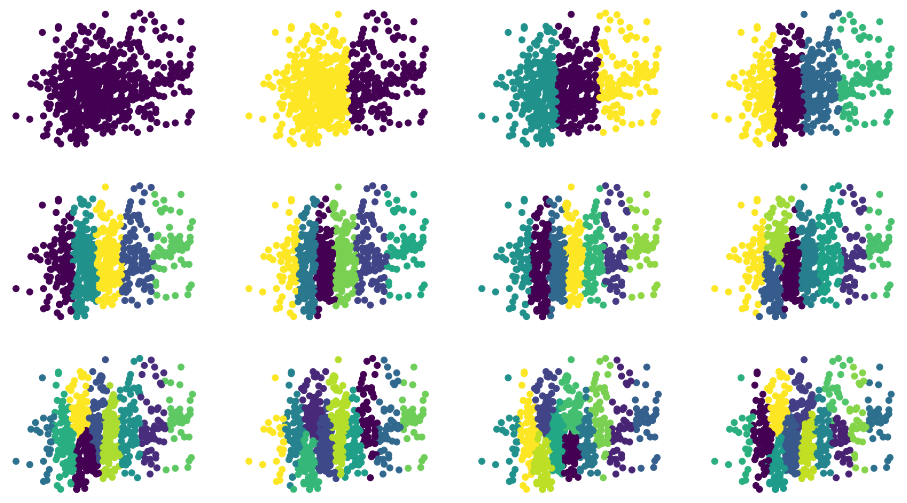

In [80]:
maxk = 13
wcss = []
sil_score = []

X = df_filtered[features]

fig, axes = plt.subplots(3, 4, figsize=(16,9))

for k, ax in zip(range(1,maxk), axes.flatten()):
    Kmean_2 = KMeans(k)
    Kmean_2.fit(X)
    ax.axis('off')
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=Kmean_2.labels_.astype(float))
    
    # compute the within-cluster sum of squares (WCSS)
    wcss.append(Kmean_2.inertia_) 
    
    if k > 1:
        sil_score.append(metrics.silhouette_score(X, Kmean_2.labels_, metric='euclidean'))


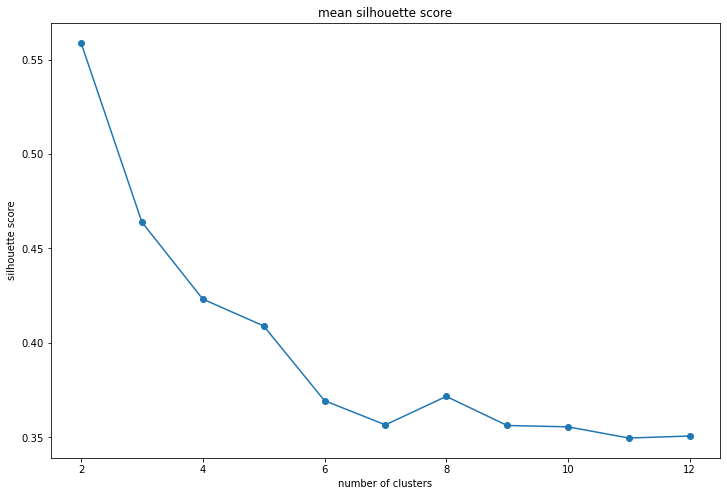

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(2,maxk), sil_score, 'o-')


ax.set_title('mean silhouette score')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score');

#### 2 clusters is the right amount because it has the highest silhouette score.

In [82]:
# let's just focus on num_clusters = 4 and redo our kmeans clustering
num_clusters = 2
Kmean_2= KMeans(n_clusters=num_clusters)
Kmean_2.fit(df_filtered[features])

# make new column for "cluster label" and assign cluster label value based on kmeans analysis

df_filtered.loc[Kmean_2.labels_==0,'cluster_label'] = 0
df_filtered.loc[Kmean_2.labels_==1,'cluster_label'] = 1

df_filtered.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,6,148,72,35,0,33.6,0.627,50,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,5,116,74,0,0,25.6,0.201,30,0,0.0


In [83]:
outcome = df_filtered.get("Outcome").to_list()
prediction = df_filtered.get("cluster_label").to_list()

In [84]:
features

['Glucose', 'BMI']

In [85]:
accuracy_K2, valid_predictions_K2, invalid_predictions_K2  = compare_outcome(outcome, prediction)
print(accuracy_K2)
print(valid_predictions_K2)
print(invalid_predictions_K2)

0.7433489827856025
475
164


In [86]:
print(f"Incorrect Number of Predictions:   {invalid_predictions_K2}")
print(f"Correct Number of Predictions:  {valid_predictions_K2}")
print(f"Accuracy Percentage:  {(round((accuracy_K2)*100))} %")

Incorrect Number of Predictions:   164
Correct Number of Predictions:  475
Accuracy Percentage:  74 %


## KMeans Cluster Analysis Using Raw Data vs. Filtered Data

The KMeans Cluster Analysis using the raw data and df_filtered did not produce large chage in model accuracy. The filtered data frame was only more accurate by 1%. It makes sense that the filtered data wouldn't make a big difference since BMI and Glucose had few 0 values.

## Logistic Regression

In [87]:
# re-importing clean df
df = pd.read_csv("diabetes.csv")

In [88]:
X = df.drop([column_names[8]], axis = 1)
y = df[column_names[8]]

x_train, x_test, y_train, y_test = holdout(X, y, test_size = .2, random_state = 0)

In [89]:
Log_Reg_1 = LogisticRegression(max_iter = 500, fit_intercept = True)
Log_Reg_1.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [90]:
Log_Reg_1.classes_

array([0, 1])

In [91]:
print("Intercept ->", Log_Reg_1.intercept_)

Intercept -> [-8.15335462]


In [92]:
print("Coefficients ->", Log_Reg_1.coef_)

Coefficients -> [[ 0.09073419  0.03387574 -0.01370562  0.00460104 -0.00139625  0.08793758
   0.80766753  0.02008247]]


In [93]:
# for i, name in enumerate(X.columns):
#     print(f'{name:>10}: {model.coef_[i]}') 

In [94]:
y_pred = Log_Reg_1.predict(x_test)

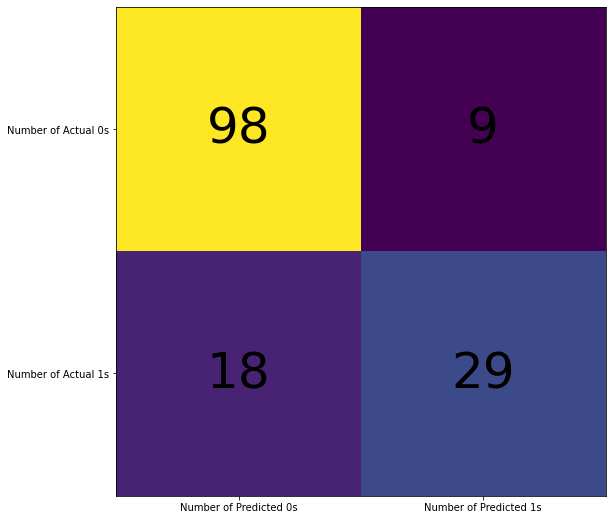

In [95]:
confusion_matrix_1 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(9, 9))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Number of Predicted 0s', 'Number of Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Number of Actual 0s', 'Number of Actual 1s'))
ax.set_ylim(1.5, -.5)
ax.imshow(confusion_matrix_1)
ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_1[i, j], ha='center', va='center', color='black', alpha = 1, fontsize = 50)
plt.show()

In [96]:
valid_predictions_LR1 = confusion_matrix_1[0][0] + confusion_matrix_1[1][1]
invalid_predictions_LR1 = confusion_matrix_1[0][1] + confusion_matrix_1[1][0]

In [97]:
print(f"Incorrect Number of Predictions:   {invalid_predictions_LR1}")
print(f"Correct Number of Predictions:  {valid_predictions_LR1}")
print(f"Accuracy Percentage:  {(round(valid_predictions_LR1/np.sum(confusion_matrix_1),2)*100)} %")

Incorrect Number of Predictions:   27
Correct Number of Predictions:  127
Accuracy Percentage:  82.0 %


### Logistic Regression Conclusion

Logistic regression was more accurate than KMeans at predicting diabetes outcome given the features Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

# Logistic Regression Using Filtered Data

In [98]:
# filtering our KMeans Cluster Analysis from df_filtered
df_filtered = df_filtered.iloc[:, :-1]

In [99]:
df_filtered.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


In [100]:
X = df_filtered.drop([column_names[8]], axis = 1)
y = df_filtered [column_names[8]]

x_train, x_test, y_train, y_test = holdout(X, y, test_size = .2, random_state = 0)

In [101]:
Log_Reg_2 = LogisticRegression(max_iter = 500, fit_intercept = True)
Log_Reg_2.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [102]:
Log_Reg_2.classes_

array([0, 1])

In [103]:
print("Intercept ->", Log_Reg_2.intercept_)

Intercept -> [-9.61503698]


In [104]:
print("Coefficients ->", Log_Reg_2.coef_)

Coefficients -> [[ 0.12652852  0.04293641 -0.00659373  0.0070441  -0.00262614  0.08582366
   1.30969418  0.00325913]]


In [105]:
y_pred = Log_Reg_2.predict(x_test)

In [106]:
y_test

460    0
490    0
518    0
610    0
85     0
      ..
339    1
175    0
12     0
500    0
385    0
Name: Outcome, Length: 128, dtype: int64

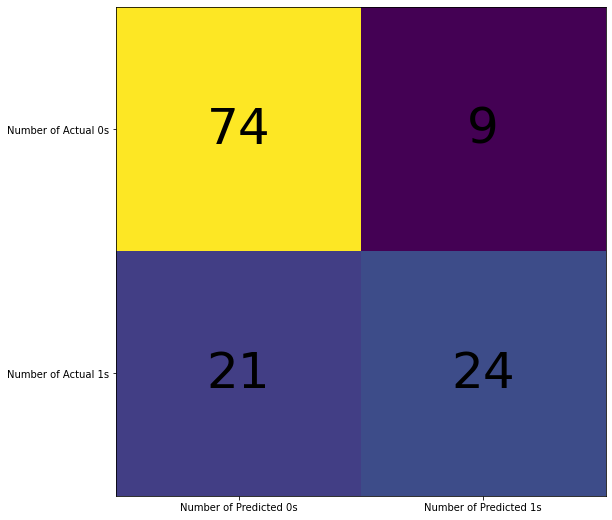

In [107]:
confusion_matrix_2 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(9, 9))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Number of Predicted 0s', 'Number of Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Number of Actual 0s', 'Number of Actual 1s'))
ax.set_ylim(1.5, -0.5)
ax.imshow(confusion_matrix_2)
ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_2 [i, j], ha='center', va='center', color='black', alpha = 1, fontsize = 50)
plt.show()

In [108]:
confusion_matrix_2

array([[74,  9],
       [21, 24]])

In [109]:
valid_predictions_LR2 = confusion_matrix_2[0][0] + confusion_matrix_2[1][1]
invalid_predictions_LR2 = confusion_matrix_2[0][1] + confusion_matrix_2[1][0]

In [110]:
print(f"Incorrect Number of Predictions:   {invalid_predictions_LR2}")
print(f"Correct Number of Predictions:  {valid_predictions_LR2}")
print(f"Accuracy Percentage:  {(round(valid_predictions_LR2/np.sum(confusion_matrix_2),2)*100)} %")

Incorrect Number of Predictions:   30
Correct Number of Predictions:  98
Accuracy Percentage:  77.0 %


Using df_filtered without outliers actually decreased the accuracy of the Logistic Regression Model. This may indicate that the computer uses outliers in this data set to improve the model's accuracy. Additionally, it could indicate that the outliers are more dense in either group, thus improving the model's accuracy. The density of these outliers could be caused by true differences or caused by issues in gathering data. With more time, this could be an interesting question to explore. 

### references
https://www.upgrad.com/blog/pca-in-machine-learning/#:~:text=Best%20Machine%20Learning%20Courses%20%26%20AI%20Courses%20Online,-Master%20of%20Science&text=In%20that%20case%2C%20you%20can,techniques%20by%20ML%20developers%2Ftesters.

https://www.youtube.com/watch?v=Lsue2gEM9D0

https://www.keboola.com/blog/pca-machine-learning

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.geeksforgeeks.org/principal-component-analysis-with-python/

https://www.ibm.com/topics/logistic-regression

https://realpython.com/logistic-regression-python/#:~:text=The%20logistic%20regression%20function%20%F0%9D%91%9D(%F0%9D%90%B1)%20is%20the%20sigmoid%20function,that%20the%20output%20is%200.

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

https://www.youtube.com/watch?time_continue=1&v=71iXeuKFcQM&feature=emb_logo

https://www.cdc.gov/diabetes/library/features/diabetes-and-women.html

https://www.womenshealth.gov/a-z-topics/diabetes

https://www.cdc.gov/diabetes/basics/gestational.html

https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/gestational-diabetes#:~:text=Gestational%20diabetes%20mellitus%20(GDM)%20is,being%20absorbed%20by%20the%20cells.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6274679/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7744927/